In [208]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display

In [209]:
num = 18
frames = [];
for i in range(num):
    rgb = cv2.imread('frames/%d.png'%i)
    frames.append(rgb)

In [210]:
gray1 = cv2.imread('frames/7.png',0)

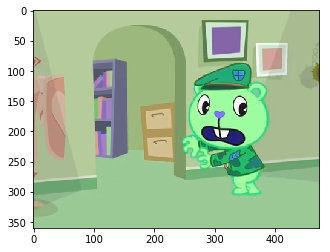

In [211]:
plt.imshow(frames[8], cmap = plt.cm.gray)
plt.show()

In [212]:
np.array(frames);

In [213]:
channel = 3
row = len(frames[0])
col = len(frames[0][0])

## Obtain Background Image by Prof.Irfan's Logic

In [214]:
background = np.zeros((row,col,channel))

In [215]:
for i in range(row):
    for j in range(col):
        for l in range(channel):
            bg = []
            for k in range(num):
                bg.append(frames[k][i][j][l])
            np.array(bg)
            res = np.median(bg)
            background[i][j][l] = res


In [216]:
background = np.uint8(background)

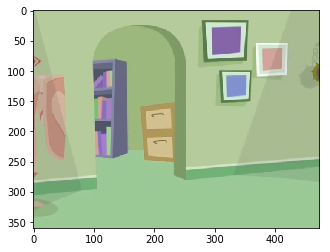

In [217]:
plt.imshow(background)

## Retrieve the Object via GrabCut

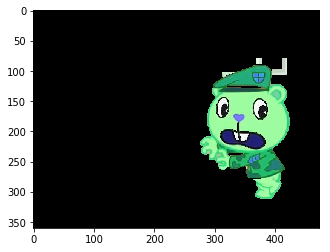

In [218]:
img1 = cv2.imread('frames/7.png')              # img.shape : (413, 620, 3)
mask1 = np.zeros(img1.shape[:2],np.uint8)   # img.shape[:2] = (413, 620)
# img2 = cv2.imread('frame2.png')              # img.shape : (413, 620, 3)
# mask2 = np.zeros(img2.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (270,80,175,250)

# this modifies mask 
cv2.grabCut(img1,mask1,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# If mask==2 or mask== 1, mask2 get 0, other wise it gets 1 as 'uint8' type.
mask2 = np.where((mask1==2)|(mask1==0),0,1).astype('uint8')

# adding additional dimension for rgb to the mask, by default it gets 1
# multiply it with input image to get the segmented image
img_cut = img1*mask2[:,:,np.newaxis]

plt.imshow(img1)

plt.imshow(img_cut)

In [219]:
print(np.max(mask2))

1


## Blurring the Retrieved Object as Mask

In [220]:
w = widgets.IntSlider() # use the slider to choose how "blurry" you want the output to be
display(w)

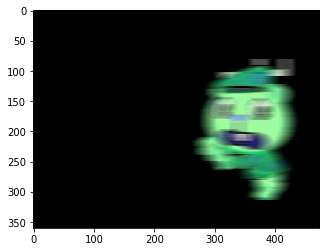

In [241]:
size = w.value if w.value > 18 else 18
# size = 21
kernel = np.zeros((size,size))
kernel[int((size-1)/2.0),:] = np.ones(size)
kernel = kernel/size
output = cv2.filter2D(img_cut,-1,kernel)
plt.imshow(output, cmap = plt.cm.gray)

## Blurring the Whole Raw Image

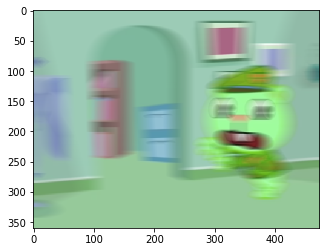

In [242]:
# print(kernel)
filterAll = cv2.filter2D(img1, -1, kernel)
filterAll = cv2.cvtColor(filterAll, cv2.COLOR_BGR2RGB)
plt.imshow(filterAll, cmap = plt.cm.gray)

In [243]:
img_cut_RGB = cv2.cvtColor(img_cut, cv2.COLOR_BGR2RGB)
output_RGB = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

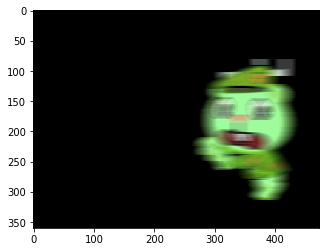

In [244]:
plt.imshow(output_RGB)

224


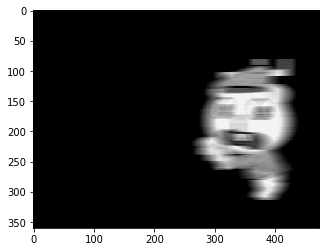

In [245]:
aimask = cv2.cvtColor(output_RGB, cv2.COLOR_RGB2GRAY)
plt.imshow(aimask, cmap=plt.cm.gray)
print(np.max(aimask))

## Doing Composition with Blurred Mask

In [246]:
res = np.zeros((row,col,channel))
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
for i in range(row):
    for j in range(col):
        if aimask[i][j] > 0:
            res[i][j] = filterAll[i][j]
#         if aimask[i][j] > 0:
#             res[i][j] = background[i][j] * output_RGB[i][j]
        else:
            res[i][j] = background[i][j]
#         for k in range(channel):
#             if (output_RGB[i][j][k] == 0):
#                 res[i][j][k] = background[i][j][k]
#             else :
#                 res[i][j][k] = output_RGB[i][j][k]

In [247]:
res = np.uint8(res)
# res = cv2.cvtColor(background, cv2.COLOR_RGB2BGR)

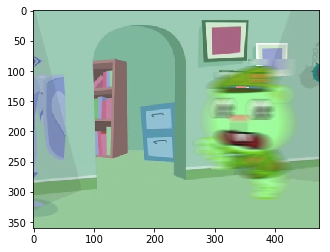

In [248]:
plt.imshow(res, cmap = plt.cm.gray)

## Generate Showcase Video

In [249]:
# rawList = []
# resHeight, resWidth, c = res.shape
# fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# video = cv2.VideoWriter('raw.mov', fourcc, fps = 10, frameSize = (resWidth, resHeight), isColor = 1)

# for ff in frames:
#     video.write(ff)

In [250]:
# newList = []
# num = 18
# # frames = [];
# for i in range(num):
#     rgb = cv2.imread('blur/%d.png'%i)
#     newList.append(rgb)

# resHeight, resWidth, c = newList[0].shape
# video = cv2.VideoWriter('blurred.mov', fourcc, fps = 10, frameSize = (resWidth, resHeight), isColor = 1)

# for ff in frames:
#     video.write(ff)